# Cell segmentation


This example shows how to use the function of cell segmentation. We provide two models for cell segmentation, deep cell model and our own deep learning model.


## Using our deep learning model

First, you need to download the model from the cloud disk to the local directory.

Download [our model](https://pan.genomics.cn/ucdisk/s/vm6JNz)

It is assumed that the local storage path of the model is './seg_model_20211210.pth'.

If you want to use gpu to predict, set the gpu id by the param `gpu`. if -1, use the cpu to predict, default -1.

In [5]:
from stereo import image as im

model_path = './seg_model_20211210.pth'
img_path = './20210426-T173-Z3-L-M019-01_regist_21635_18385_9064_13184.tif'
out_path = './stereopy/'

im.cell_seg(model_path, img_path, out_path)

256 256
【image 1/1】


## Using deep cell model

Download [deep cell model](https://pan.genomics.cn/ucdisk/s/6JFbIr)

It is assumed that the local directory is './models/deepcell/'

In [24]:
model_dir = './models/deepcell/'
out_path = './deepcell/'

im.cell_seg_deepcell(model_dir, img_path, out_path)


【image 1/1】 batch:[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100%	1/1


After running the function, three result pictures will be generated in the out path directory.

- _mask.tif: cell segmentation result

- _outline.tif: cell boundary result

- _score.tif: cell fraction result

Show the cell segmentation result.

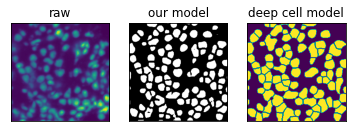

In [29]:
# %matplotlib inline

import matplotlib.pyplot as plt


_, axes = plt.subplots(1, 3)
im = plt.imread('./20210426-T173-Z3-L-M019-01_regist_21635_18385_9064_13184.tif')
axes[0].imshow(im)
_ = axes[0].set_title("raw")
axes[0].set_yticks([])
axes[0].set_xticks([])

im = plt.imread('./20210426-T173-Z3-L-M019-01_regist_21635_18385_9064_13184_mask.tif')
axes[1].imshow(im)
_ = axes[1].set_title("our model")
axes[1].set_yticks([])
axes[1].set_xticks([])

im = plt.imread('./20210426-T173-Z3-L-M019-01_regist_21635_18385_9064_13184_mask.tif')
axes[2].imshow(im)
_ = axes[2].set_title("deep cell model")
axes[2].set_yticks([])
_ = axes[2].set_xticks([])

## Generating cell bin gef

After generating a mask by the function of cell segmentation, you can generate a cell bin gef from this mask and the corresponding bgef(SN.raw.gef/SN.gef/SN.tissue.gef).

First, you need a bgef, and then refer to the example below.

You should specify the path of directory to save cell bin gef by parameter cgef_out_dir, the path of bgef by parameter bgef_path and the path of mask by parameter mask_path.

It will return the path of cell bin gef.

In [ ]:
from stereo.tools import CellCut

cgef_out_dir = "./cell_cut_out"
bgef_path = "/ldfssz1/ST_BI/USER/stereopy/test/tanliwei/test/test_data/SS200000561BL_B3.bgef"
mask_path = "/ldfssz1/ST_BI/USER/stereopy/test/tanliwei/test/test_data/SS200000561BL_B3_regist_mask.tif"

cc = CellCut(cgef_out_dir=cgef_out_dir)
out_path = cc.cell_cut(bgef_path=bgef_path, mask_path=mask_path)